In [48]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
df = pd.read_csv("Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [33]:
# Checking for missing values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [ ]:
df['Grade'] = df['Grade'].replace(' anaplastic; Grade IV', 4)
df['Grade'] = df['Grade'].astype(int)

# Features/target
X = df.drop(["Status", "Survival Months"], axis=1)  # drop survival months to avoid leakage
y = df['Status']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Alive=0, Dead=1

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42, stratify=y_encoded)


In [64]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
print(cat_cols, num_cols)

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols),
    ('scaler', StandardScaler(), num_cols)
], remainder='passthrough')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(
        max_depth=100,
        criterion='gini',
        min_samples_split=10,
        min_samples_leaf=10
    ))
])

train_acc, val_acc = [], []

# Training the decision tree model
for depth in range(1, 21):
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', DecisionTreeClassifier(
            max_depth=depth,
            criterion='gini',
            random_state=42
        ))
    ])

    pipe.fit(X_train, y_train)
    
    y_pred_train = pipe.predict(X_train)
    y_pred_val = pipe.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, y_pred_train))
    val_acc.append(accuracy_score(y_test, y_pred_val))

Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status'],
      dtype='object') Index(['Age', 'Grade', 'Tumor Size', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')


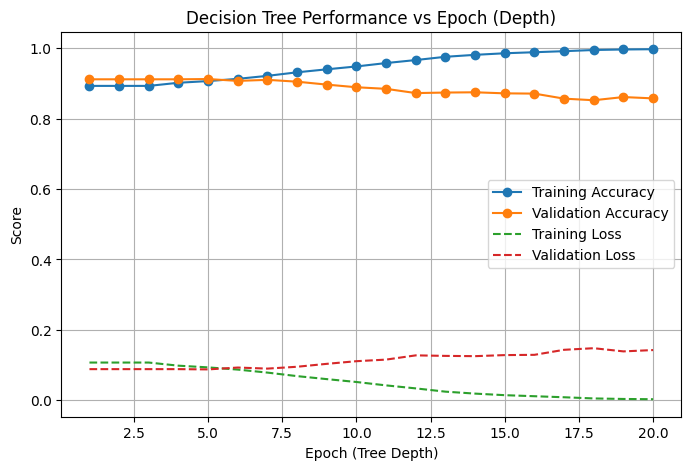

In [65]:
epochs = range(1, 21)
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, marker='o', label='Training Accuracy')
plt.plot(epochs, val_acc, marker='o', label='Validation Accuracy')

# loss = 1 - accuracy
plt.plot(epochs, [1-a for a in train_acc], '--', label='Training Loss')
plt.plot(epochs, [1-a for a in val_acc], '--', label='Validation Loss')

plt.xlabel("Epoch (Tree Depth)")
plt.ylabel("Score")
plt.title("Decision Tree Performance vs Epoch (Depth)")
plt.legend()
plt.grid(True)
plt.show()